In [1]:
# test using ESPPRC on the simple test graph.
# Note: The results can be different compared to test_ESPP because here resources are taken into account.
import networkx as nx
import logging
import numpy as np


import os
dir_notebooks = os.getcwd()
dir_home, _ = os.path.split(dir_notebooks)

#dir_data = os.path.join(dir_home, 'data')
dir_code = dir_home
#dir_scripts = os.path.join(dir_home, 'scripts')


# Import my modules
import sys
sys.path.append(dir_code) 

import pylgrim
import tests.tools as testtools

In [2]:
# possible values are: WARNING, INFO, DEBUG, ...
# (see https://docs.python.org/3/library/logging.html#logging-levels)
logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)

In [3]:
# optional keywords that should also work without using them
res_name = 'res_cost'

In [4]:
def create_test_graph(add_nodes_to_0=False):
    """create test based on graph from [1]
    (see 'testgraph.png')
    With the flag {add_nodes_to_0} the graph can be extended with two nodes to 0"""
    G = nx.DiGraph(n_res=2)
    G.add_edge(0, 1, weight=2, res_cost=np.array([0.1,0.2]))
    G.add_edge(0, 2, weight=-4, res_cost=np.array([0.1,0.2]))
    G.add_edge(1, 2, weight=-7, res_cost=np.array([0.1,0.2]))
    G.add_edge(1, 4, weight=5, res_cost=np.array([0.1,0.3]))
    G.add_edge(2, 3, weight=3, res_cost=np.array([0.1,0.2]))
    G.add_edge(3, 1, weight=1, res_cost=np.array([0.1,0.2]))
    G.add_edge(2, 5, weight=-2, res_cost=np.array([0.1,0.2]))
    G.add_edge(5, 6, weight=2, res_cost=np.array([0.1,0.2]))
    G.add_edge(5, 4, weight=-2, res_cost=np.array([0.1,0.2]))
    G.add_edge(4, 2, weight=3, res_cost=np.array([0.1,0.2]))
    G.add_edge(4, 6, weight=3, res_cost=np.array([0.1,0.3]))
    if add_nodes_to_0:
        # add nodes to 0 for test
        G.add_edge(6, 0, weight=-1, res_cost=np.array([0.1,0.2]))
        G.add_edge(1, 0, weight=-2, res_cost=np.array([0.1,0.2]))

    return G

In [5]:
# create test graph
G = create_test_graph(add_nodes_to_0=True) #testtools.create_test_graph(add_nodes_to_0=True)
source = 0
print('Testing with {} nodes'.format(len(G)))
print('')

Testing with 7 nodes



In [6]:
# move source in-edges to a new node
source_in = 'source_in'
pylgrim.tools.decouple_source(G, source, source_in=source_in)

2

In [7]:
# profiling: use `python -m cProfile -o test_ESPPRC.prof test_ESPPRC.py`,
# followed, for example, by opening up a python notebook and running
#   import pstats
#   p = pstats.Stats('test_ESPPRC.prof')
#   p.sort_stats('cumtime')
#   p.print_stats(100)
profiling = False

if profiling:
    n_runs = 100
else:
    n_runs = 1

In [8]:
for _ in range(n_runs):
    # solve using ESPPRC
    #target = 4
    target = source_in
    max_res = list([1.0,1.0])
    G_pre, res_min = pylgrim.ESPPRC.preprocess(G, source, target, max_res, res_name=res_name)
    shortest_path, shortest_path_label = pylgrim.ESPPRC.GSSA(G_pre, source, target, max_res, res_min, res_name=res_name)

    if profiling:
        continue
    
    print('shortest path found: {} with label {}'.format(shortest_path, shortest_path_label))
    print('')

    while True:
        try:
            e = shortest_path.__next__()
            print('{} ⇨ {} : {}'.format(*e))
            print('')
        except StopIteration:
            # last element reached
            break

shortest path found: 0 ⇨ 1 ⇨ 2 ⇨ 5 ⇨ 6 ⇨ source_in with label (-6, array([0.5, 1. ]))

0 ⇨ 1 : {'weight': 2, 'res_cost': array([0.1, 0.2])}

1 ⇨ 2 : {'weight': -7, 'res_cost': array([0.1, 0.2])}

2 ⇨ 5 : {'weight': -2, 'res_cost': array([0.1, 0.2])}

5 ⇨ 6 : {'weight': 2, 'res_cost': array([0.1, 0.2])}

6 ⇨ source_in : {'weight': -1, 'res_cost': array([0.1, 0.2])}



In [9]:
shortest_path

0 1 2 5 6 source_in

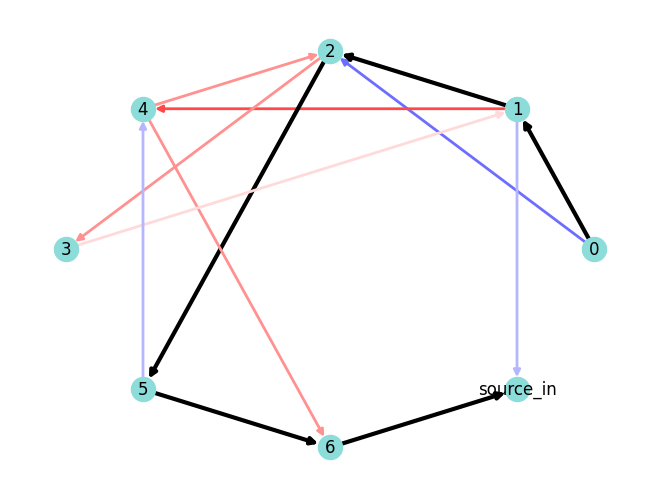

In [11]:
# visualize
testtools.visualize_path(G, shortest_path)

In [ ]:
# move source in-edges back from new node
pylgrim.tools.undecouple_source(G, source, source_in=source_in)